# The Sparks Foundation
# Task 1: Prediction using Supervised ML
## Author: Sohini Mukherjee (1.04.2021)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

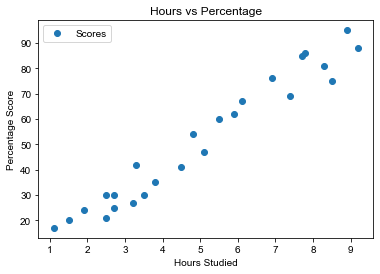

In [3]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
sns.set_style('whitegrid')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Splitting Data for Linear Regression

Here X is our independant variable and y is dependant. We aim to predict scores so it is our target variable stored in y.

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Scatter plot with Regression Line

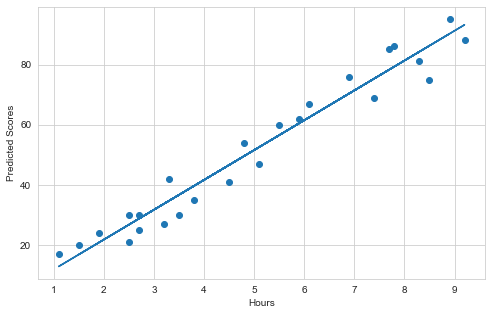

In [9]:
#regression line
line = model.intercept_ + model.coef_*X

#scatter plot
plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Hours')
plt.ylabel('Predicted Scores')
plt.show()

## Model Predictions

In [10]:
y_pred = model.predict(X_test)

In [11]:
#Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [12]:
print('Predicted score: ', model.predict([[9.25]]))

Predicted score:  [93.69173249]


## Evaluating the model

In [13]:
from sklearn import metrics

In [14]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [15]:
print('Mean Absolute Error = ', MAE)
print('\n')
print('Mean Squared Error = ', MSE)
print('\n')
print('Root Mean Squared Error = ', RMSE)

Mean Absolute Error =  4.183859899002975


Mean Squared Error =  21.5987693072174


Root Mean Squared Error =  4.6474476121003665
